In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.construct import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from random import *    
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
#Mutual information
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.svm import NuSVC

df = pd.read_csv("Kasperstuff/masterNew.csv",sep=';')
#print("data shape: ", df.shape)
#print("data head: ", df.head)

first_column = df.columns[0]
df = df.drop([first_column], axis=1)
feature_labels = df.columns
last = df.iloc[:,-1]
df = df.iloc[:, :-1]

X = df
y = np.ravel(last.to_numpy()
            )
#print("y: ", y)
#print("data X: ", X)
#print("features: ",feature_labels[:-1])

#X_t = df.to_numpy()
#yy = np.ravel(last.to_numpy())

X1, X_testEnd, y1, y_testEnd = train_test_split(X, y, test_size = 0.1)


#run mutual information til 60 % reduction
#sel = SelectPercentile(mutual_info_classif, percentile=20).fit(X1, y1)
#model = list()    
#X_t = sel.transform(X1)
X_t = X1.to_numpy()
from sklearn.svm import NuSVC
model = list()
features = list()

for x in range(1,2):
    folds = 6
    skf = StratifiedKFold(n_splits=folds, random_state=0, shuffle=True, )
    skf.get_n_splits(X_t, y1)
    acc_score = []
    for train_index, test_index in skf.split(X_t, y1):
        X_train, X_test = X_t[train_index], X_t[test_index]
        y_train, y_test = y1[train_index], y1[test_index]
        
        scale = StandardScaler()
        scaler = scale.fit(X_train)
        
        X_train1 = scaler.transform(X_train)
        X_test1 = scaler.transform(X_test)
        
        estimator = SVC(kernel="linear")
        #estimator = SVC(kernel="linear", decision_function_shape='ovo', cache_size=200, class_weight={'Basal':1, 'Her2':1, 'LumA':1, 'LumB':1.3, 'Normal':1}, random_state=randint(1, 10000))
        selector = RFE(estimator, n_features_to_select=50, step=100, verbose=1)
        selector = selector.fit(X_train1, y_train)

        print("Support: ", selector.support_)
        print("Ranking", selector.ranking_)

        #from imblearn.over_sampling import SMOTE
        #oversample = SMOTE()
        X_test2, y_test2 = X_test1, y_test
        #X_test2, y_test2 = oversample.fit_resample(X_test1, y_test)

        X_train11 = pd.DataFrame(X_train1)
        X_test11 = pd.DataFrame(X_test2)

        f = selector.get_support(1)

        X_train = X_train11[X_train11.columns[f]]
        X_test = X_test11[X_test11.columns[f]]

        clf = SVC(kernel="linear", C = 0.1,decision_function_shape='ovo', class_weight = None, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        #print('Accuracy on test set: ')
        print(accuracy_score(y_test2, y_pred))
        print(confusion_matrix(y_test2,y_pred))
        print(classification_report(y_test2,y_pred))
        acc_score.append(accuracy_score(y_test2, y_pred))
        
        features.append(df[df.columns[f]])
    model.append(acc_score)
    print("Average score:", np.mean(acc_score))
    #model.append(acc_score)             
print("Model:", model)

Fitting estimator with 17807 features.
Fitting estimator with 16807 features.
Fitting estimator with 15807 features.
Fitting estimator with 14807 features.
Fitting estimator with 13807 features.
Fitting estimator with 12807 features.
Fitting estimator with 11807 features.
Fitting estimator with 10807 features.
Fitting estimator with 9807 features.
Fitting estimator with 8807 features.
Fitting estimator with 7807 features.
Fitting estimator with 6807 features.
Fitting estimator with 5807 features.
Fitting estimator with 4807 features.
Fitting estimator with 3807 features.
Fitting estimator with 2807 features.
Fitting estimator with 1807 features.
Fitting estimator with 807 features.
Support:  [False False False ... False False False]
Ranking [ 2  3  4 ... 13 16 17]
0.8081395348837209
[[26  0  1  0  0]
 [ 0  5  4  2  0]
 [ 0  1 69  6  5]
 [ 0  6  5 19  0]
 [ 0  0  3  0 20]]
              precision    recall  f1-score   support

       Basal       1.00      0.96      0.98        27
      

81
317
815
1079
2020
2330
2743
4130
5354
5384
5731
6316
6903
7632
7860
8091
8203
8852
9015
10036
10063
10294
10872
11825
12553
13190
13893
14006
15345
16939
17208
17243
Top doules features names:  ('ZNF451', 'WDR67', 'TYRP1', 'TRIM6-TRIM34', 'TMEM59L', 'TMEM194B', 'TCEAL8', 'SPAG16', 'SOHLH1', 'SCN3B', 'RNF2', 'RGPD1', 'RCVRN', 'PPY2', 'PPIL5', 'PLA2G10', 'PGR', 'PARP2', 'MBOAT1', 'MAGEB18', 'LGSN', 'LCN6', 'INTS4L1', 'FGFBP1', 'EFNA2', 'CNIH3')
Top doules weights:  (0.000751892775229126, 0.0007373822608216905, 0.0006689634655587045, 0.0004607932729658119, 0.000373317840074285, 0.0003680334023922126, 0.0003374061498473742, 0.0003120288799849399, 0.000287718397734072, 0.0002621770061512112, 0.00024835574106553654, 0.00024289927854100822, 0.0002422100847340999, 0.0002213142576189632, 0.00021787693610385186, 0.00020570060559465392, 0.0002039080770115824, 0.00019979767524158607, 0.0001955009843546287, 0.0001841098623569923, 0.00017501486272160195, 0.00016655869011081826, 0.0001613879158594

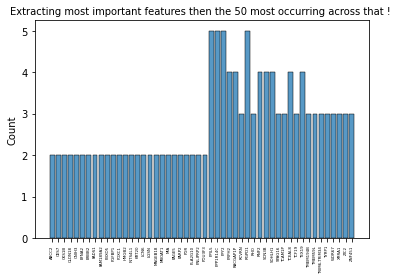

In [2]:
uniquelist = list()
allfeatures = list()
merged = list()
for i in features:
    allfeatures.append(i.columns)
for subset in allfeatures:
    for word in subset:
        merged.append(word)
    
unique = []
double = []
triple = []
final = []
for number in merged:   
    if number in unique:
        if number in double:
            final.append(number)
        else:
            double.append(number)       
    else:
        unique.append(number)
        
from numpy.core.fromnumeric import sort

#print(unique)
#print(final)
finish = final + double + double
#print(sort(finish))

morethan22 = []
morethan2 = 0
twoOrLess = 0
twoOrLesss = []
for number2 in np.unique(finish).tolist():   
    if (number2 in np.unique(final).tolist()):
        morethan22.append(number2)
        morethan2 = morethan2 + 1
    else:
        twoOrLess = twoOrLess + 1
        twoOrLesss.append(number2)


l = list()
indexNames = list()
newImp = list()

def f_importances(coef, names, top):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    for ind, colum in enumerate(df.columns):
        for name in twoOrLesss:  
            if colum == name:
                print(ind)
                #index = names.index(name)
                newImp.append(imp[ind])
                
    imp2, names2 = zip(*sorted(list(zip(newImp, twoOrLesss))))
    print("Top doules features names: ", names2[::-1][0:top])
    print("Top doules weights: ", imp2[::-1][0:top])
    l.append(names2[::-1][0:top])

clfAll = SVC(kernel="linear", C = 0.1,decision_function_shape='ovo', class_weight = None, random_state=42)
clfAll.fit(X, y)

absCoef = abs(clfAll.coef_)
absAverageCoef = absCoef.mean(axis=0)
f_importances(absAverageCoef, feature_labels, top=(50 - morethan2))

allFinalF = list()
more = list()

for jj in l[0]:
    allFinalF.append(jj)
    allFinalF.append(jj)

for ee in finish:
    if ee in final:
        more.append(ee) 

dd = allFinalF + more       

import seaborn as sns
sns_plot = sns.histplot(data=dd, shrink=.8)
sns_plot.set_xticklabels(labels= np.unique(dd).tolist(), rotation=90, fontsize=4)
sns_plot.set_title('Extracting most important features then the 50 most occurring across that ! ', fontsize=10)
sns_plot.figure.savefig('features5-333366.png', bbox_inches='tight', dpi=500)

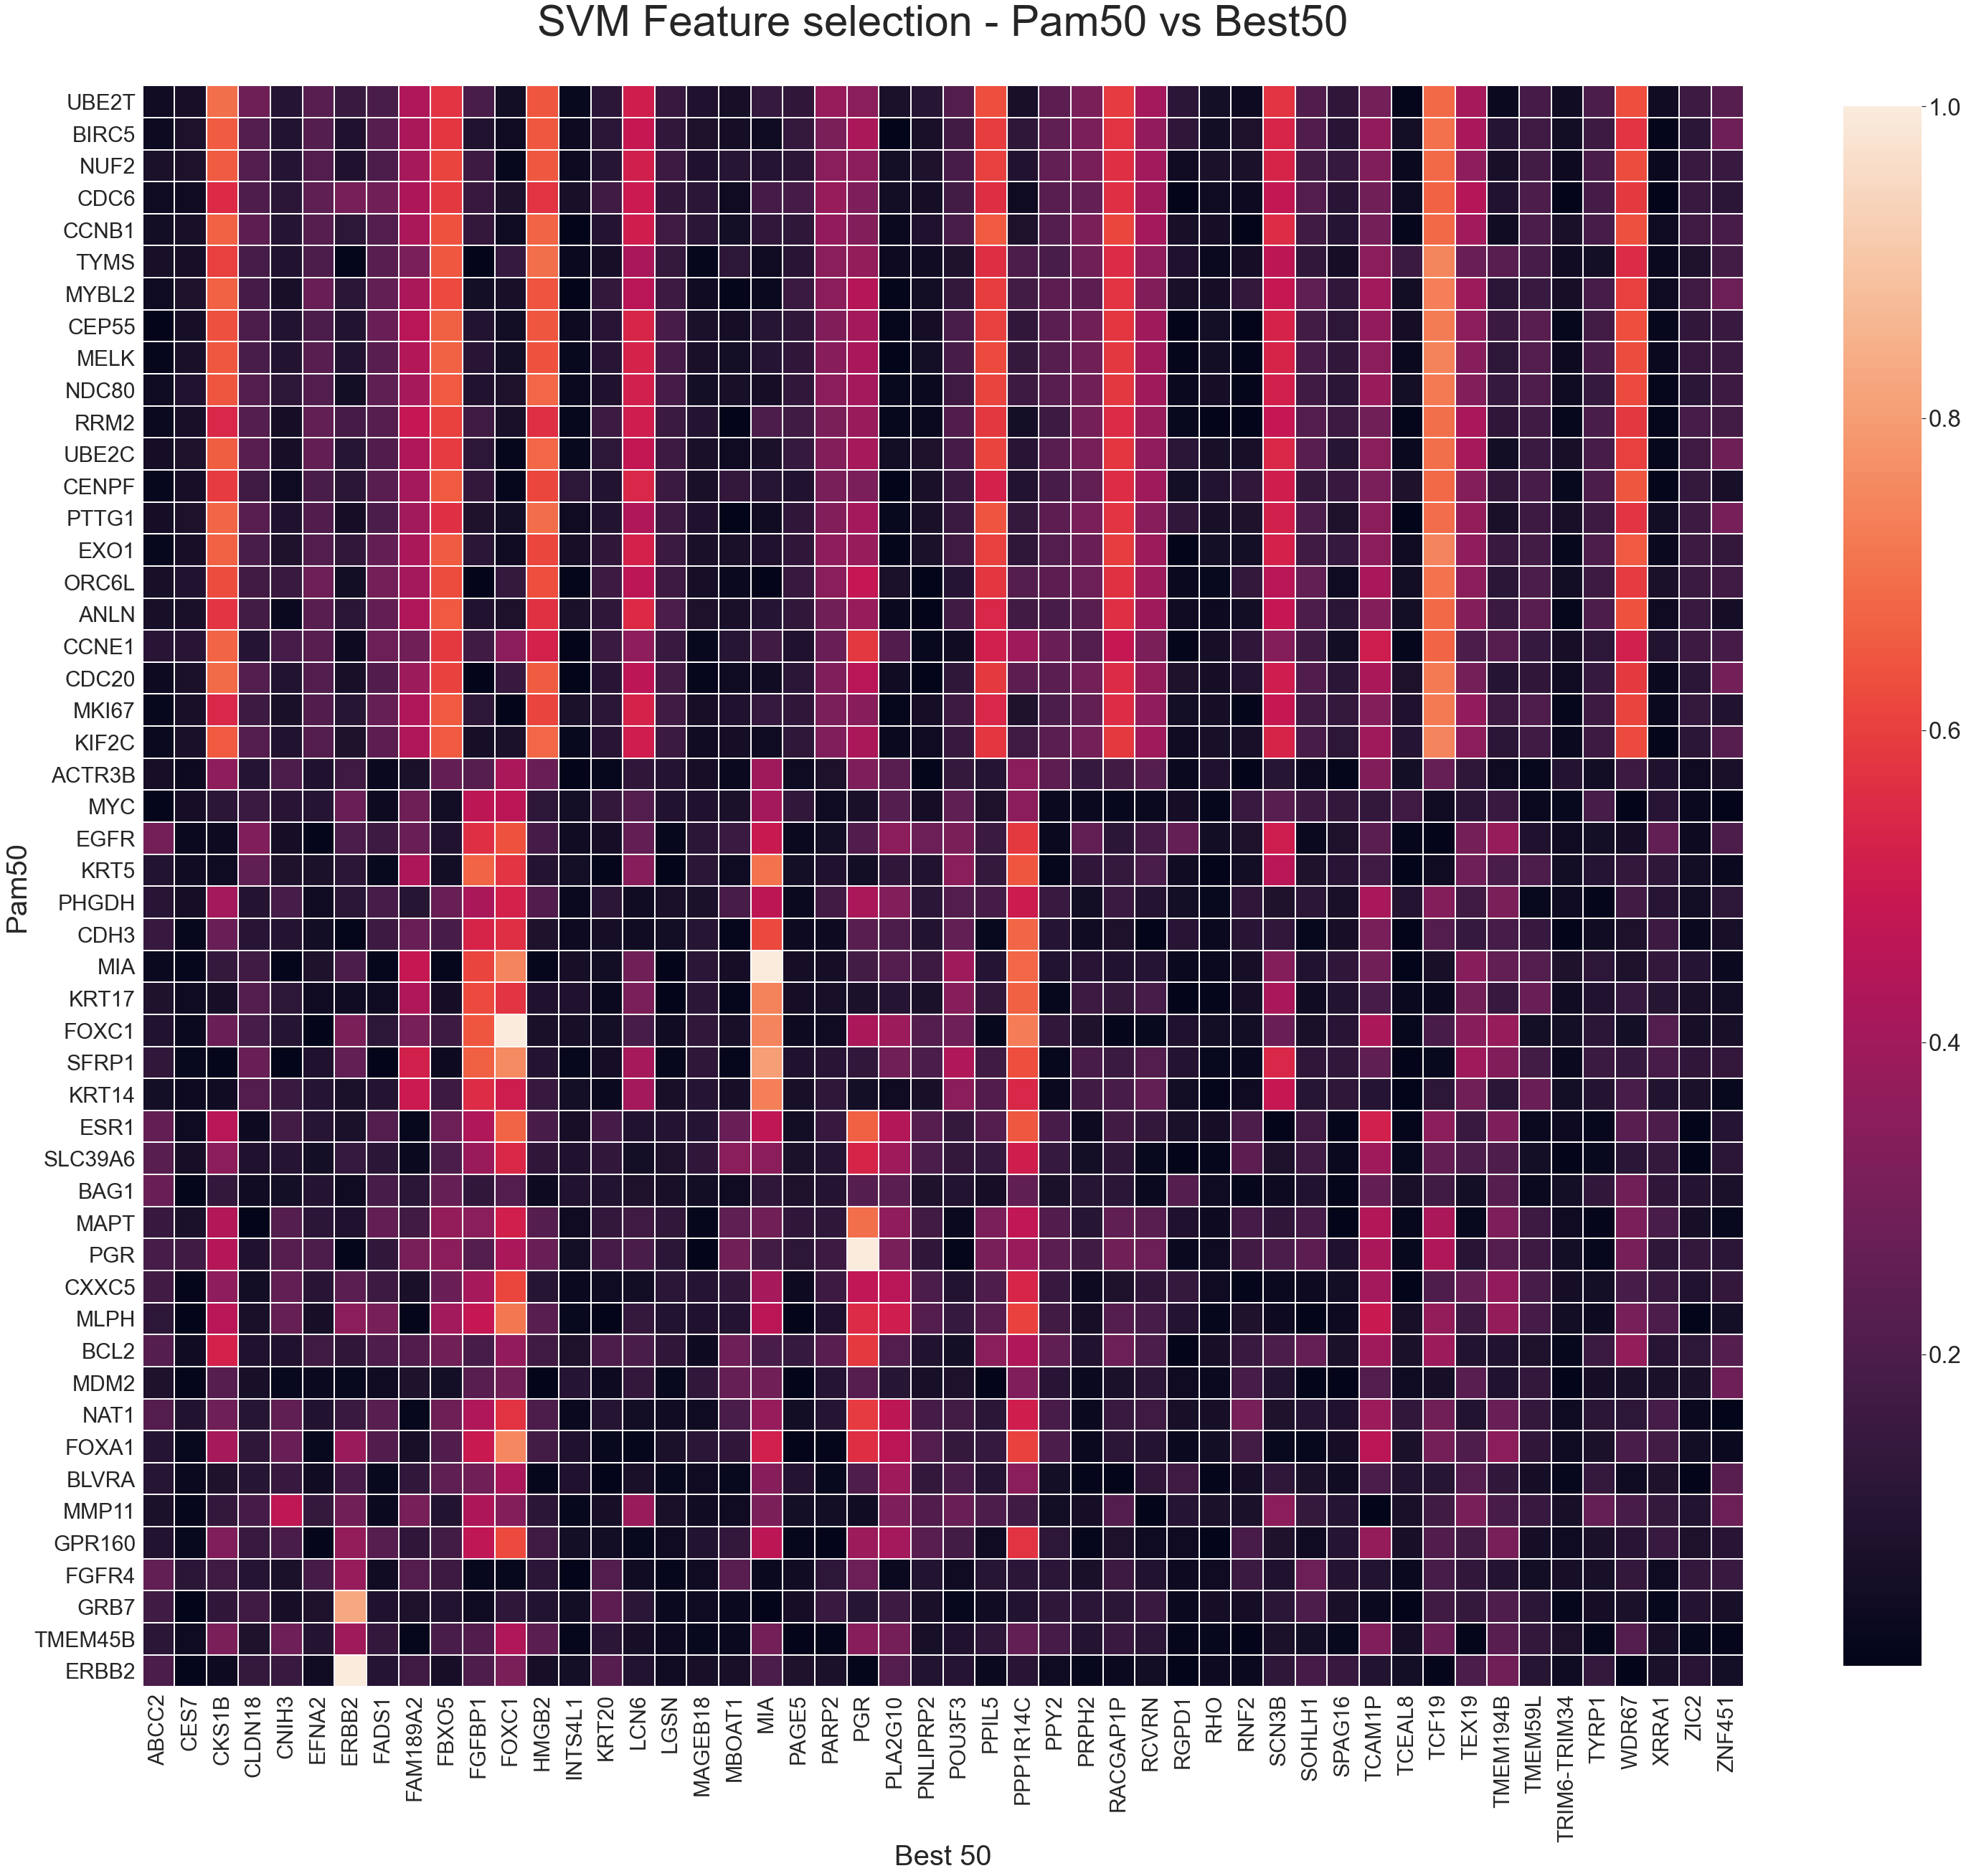

<Figure size 432x288 with 0 Axes>

In [4]:
"""pam50 = ['ACTR3B','ANLN','BAG1','BCL2','BIRC5','BLVRA','CCNB1','CCNE1','CDC20','CDC6',
'CDH3','CENPF','CEP55','CXXC5','EGFR','ERBB2','EXO1','FGFR4','FOXA1',
'FOXC1','GPR160','GRB7','KIF2C','KRT14','KRT17','KRT5','MAPT','MDM2','MELK',
'MIA','MKI67','MLPH','MMP11','MYBL2','MYC','NAT1','ORC6L','PGR','PHGDH','PTTG1','RRM2',
'SFRP1','SLC39A6','TMEM45B','TYMS','UBE2C','UBE2T']
# not in out data set : ['SR1', 'KNTC2', 'CDCA1'] so deleted from pam 50."""
pam50 = ['UBE2T', 'BIRC5', 'NUF2', 'CDC6', 'CCNB1', 'TYMS', 'MYBL2', 'CEP55', 'MELK', 'NDC80', 'RRM2', 'UBE2C', 'CENPF', 'PTTG1', 'EXO1', 'ORC6L', 'ANLN', 'CCNE1', 'CDC20', 'MKI67', 'KIF2C', 'ACTR3B', 'MYC', 'EGFR', 'KRT5', 'PHGDH', 'CDH3', 'MIA', 'KRT17', 'FOXC1', 'SFRP1', 'KRT14', 'ESR1', 'SLC39A6', 'BAG1', 'MAPT', 'PGR', 'CXXC5', 'MLPH', 'BCL2', 'MDM2', 'NAT1', 'FOXA1', 'BLVRA', 'MMP11', 'GPR160', 'FGFR4', 'GRB7', 'TMEM45B', 'ERBB2']


best50 = df[np.unique(dd).tolist()] # of latest best features
p = df[pam50]

from numpy.random import seed
from scipy.stats import pearsonr

# seed random number generator
seed(1)
# prepare data
#best50 = best50.iloc[:, 0:2]
#p = p.iloc[:, 0:2]
ll = list()
# calculate Pearson's correlation
col = list()
for ind, colum in enumerate(best50.columns):
    #corr, _ = pearsonr(p.columns[ind], column)
    #l.appende(corr)
    for ins, column in enumerate(p.columns):
        #print(colum)
        #print(column)
        #print(p.columns[ind])
        #print(ind)
        #print(best50.columns[ins])
        #print(ins)
        corr, _ = pearsonr(p[column], best50[colum])
        #print(abs(corr))
        col.append(abs(corr))
    ll.append(col)
    col=[] 
#print(l)  

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

fig, ax = plt.subplots(figsize=(50, 50))
#plt.xlabel(best50.columns)
#plt.ylabel(p.columns)

#fig.title('Pearson Absolute Values', fontsize=40)

x_axis_labels = best50.columns.to_numpy() # labels for x-axis
y_axis_labels =  p.columns.to_numpy()# labels for y-axis

# create seabvorn heatmap with required labels
b = sb.heatmap(np.array(ll).T.tolist(),  xticklabels=x_axis_labels, yticklabels=y_axis_labels,
           linewidth=0.4, cbar_kws={"shrink": .8}, fmt=".2f",square=True)
b.axes.set_title("SVM Feature selection - Pam50 vs Best50\n ",fontsize=60)
b.set_xlabel("Best 50",fontsize=40)
b.set_ylabel("Pam50",fontsize=40)
b.tick_params(labelsize=30)
sb.set(font_scale=3)
plt.show()
plt.savefig('HeatMap-Pam50vsFeatureSelectionBest50-166.jpg',dpi=400)

In [12]:
ddd = set(dd)
print(ddd)
print(len(ddd))

{'TCEAL8', 'WDR67', 'KRT20', 'ERBB2', 'FAM189A2', 'PRPH2', 'PPIL5', 'INTS4L1', 'TEX19', 'PPP1R14C', 'SPAG16', 'LCN6', 'CKS1B', 'SOHLH1', 'ZIC2', 'MIA', 'PNLIPRP2', 'XRRA1', 'RACGAP1P', 'POU3F3', 'CLDN18', 'RCVRN', 'RGPD1', 'PLA2G10', 'FGFBP1', 'FBXO5', 'MBOAT1', 'CNIH3', 'FOXC1', 'PARP2', 'TMEM59L', 'FADS1', 'MAGEB18', 'TCAM1P', 'TCF19', 'SCN3B', 'RNF2', 'TYRP1', 'TMEM194B', 'PAGE5', 'RHO', 'ABCC2', 'PPY2', 'PGR', 'HMGB2', 'CES7', 'TRIM6-TRIM34', 'EFNA2', 'LGSN', 'ZNF451'}
50


In [7]:

model = list()
X_t=df[np.unique(dd)].to_numpy()
for x in range(1,10+1):
    folds = 5
    skf = StratifiedKFold(n_splits=folds, random_state=x, shuffle=True, )
    skf.get_n_splits(X_t, y)
    acc_score = []
    for train_index, test_index in skf.split(X_t, y):
        X_train, X_test = X_t[train_index], X_t[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        scale = StandardScaler()
        scaler = scale.fit(X_train)
        
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        clf=SVC(kernel="linear", C = 0.1,decision_function_shape='ovo', class_weight = None,random_state=1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        #print('Accuracy on test set: ')
        #print(accuracy_score(y_test2, y_pred))
        print(confusion_matrix(y_test,y_pred))
        #print(classification_report(y_test2,y_pred))
        
        acc_score.append(accuracy_score(y_test, y_pred))
    model.append(acc_score)
    print("Average score:", np.mean(acc_score))
    #model.append(acc_score)             

print("Model:", model)
plt.boxplot(model)
plt.title('RFE - Choosing 50 features with SVC estimator \n Then Fitting new SVC model on the selected features',fontsize=30)
plt.xlabel('10 - 5Folds',fontsize=10)
plt.ylabel('Average score',)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("SVC-RFE-47-features-ovo-21-5.png",dpi=500)
plt.show()

[[ 37   0   0   0   0]
 [  1  12   0   2   0]
 [  0   1 101   5   0]
 [  0   2   5  33   0]
 [  0   0   0   0  30]]
[[ 36   0   0   0   0]
 [  0  12   0   4   0]
 [  0   0 105   1   0]
 [  0   0   7  34   0]
 [  1   0   3   0  26]]
[[ 36   0   0   0   0]
 [  1  15   0   0   0]
 [  0   1 101   3   1]
 [  0   2   5  34   0]
 [  0   0   2   0  28]]
[[ 35   0   0   0   1]
 [  0  15   0   1   0]
 [  0   0 101   6   0]
 [  0   0   5  36   0]
 [  1   0   1   0  27]]
[[ 36   1   0   0   0]
 [  0  14   1   0   0]
 [  0   0 103   1   3]
 [  0   3   1  36   0]
 [  0   1   1   1  26]]
Average score: 0.9344480196123497
[[ 37   0   0   0   0]
 [  0  14   0   1   0]
 [  0   1 102   3   1]
 [  0   0   2  38   0]
 [  0   0   2   0  28]]
[[ 35   0   1   0   0]
 [  1  15   0   0   0]
 [  0   0 101   3   2]
 [  0   1   2  38   0]
 [  0   0   2   1  27]]
[[ 34   2   0   0   0]
 [  0  15   0   1   0]
 [  0   0 102   4   0]
 [  0   1   8  32   0]
 [  0   1   1   0  28]]
[[ 36   0   0   0   0]
 [  0  14   0  

In [2]:
import numpy as np
np.mean([[0.9301310043668122, 0.9432314410480349, 0.9170305676855895, 0.9606986899563319, 0.9429824561403509], [0.9213973799126638, 0.9432314410480349, 0.9432314410480349, 0.9475982532751092, 0.9210526315789473], [0.925764192139738, 0.9432314410480349, 0.9563318777292577, 0.9082969432314411, 0.9342105263157895], [0.9606986899563319, 0.9475982532751092, 0.925764192139738, 0.9475982532751092, 0.9122807017543859], [0.9475982532751092, 0.9344978165938864, 0.9213973799126638, 0.9563318777292577, 0.9210526315789473], [0.9344978165938864, 0.9301310043668122, 0.9344978165938864, 0.9301310043668122, 0.9736842105263158], [0.9432314410480349, 0.9170305676855895, 0.9519650655021834, 0.9170305676855895, 0.9385964912280702], [0.9432314410480349, 0.9432314410480349, 0.9170305676855895, 0.9344978165938864, 0.9342105263157895], [0.9301310043668122, 0.9344978165938864, 0.9432314410480349, 0.9301310043668122, 0.9254385964912281]])

0.9359925772704445